In [4]:
import xarray as xr
from evaluations.confusion_table import accuracy, plot_confusion_table
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/confusion_table'
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/confusion_table_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=False)
nasa_l3_metrics_ds.groupby('forest_mask_bins').map(accuracy)

<xarray.DataArray (forest_mask_bins: 2)> Size: 16B
array([0.96413342, 0.97839662])
Coordinates:
  * forest_mask_bins  (forest_mask_bins) <U9 72B 'forest' 'no_forest'

0.1542999136204336 0.0039588673214567315


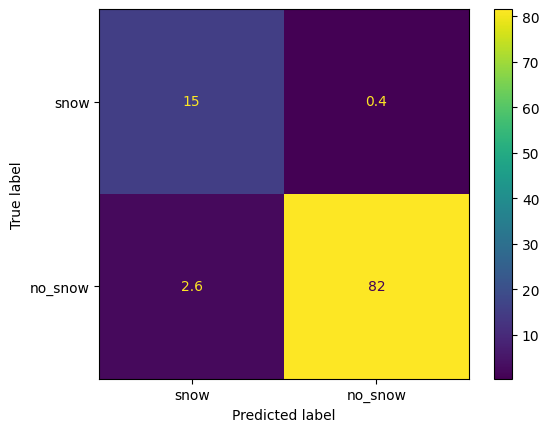

In [5]:
plot_confusion_table(nasa_l3_metrics_ds)

In [7]:
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/confusion_table_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=False)
mf_metrics_ds.groupby('forest_mask_bins').map(accuracy)

<xarray.DataArray (forest_mask_bins: 2)> Size: 16B
array([0.9656015 , 0.91082137])
Coordinates:
  * forest_mask_bins  (forest_mask_bins) <U9 72B 'no_forest' 'forest'

0.22285335965797176 0.007206524093165762


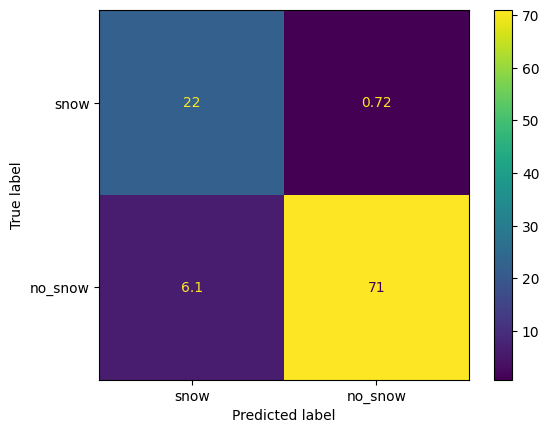

In [9]:
plot_confusion_table(mf_metrics_ds)

In [10]:
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/confusion_table_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=False)
nasa_pseudo_l3_metrics_ds.groupby('ref_bins').map(accuracy)

<xarray.DataArray (ref_bins: 12)> Size: 96B
array([0.96076713,        nan, 0.9968147 , 0.68150971, 0.76945513,
       0.85117661, 0.89492523, 0.92821606, 0.95112072, 0.97048642,
       0.98383923, 0.99483136])
Coordinates:
  * ref_bins  (ref_bins) object 96B '0' '1-10' '100' ... '71-80' '81-90' '91-99'

0.22691024371464413 0.012729092156541546


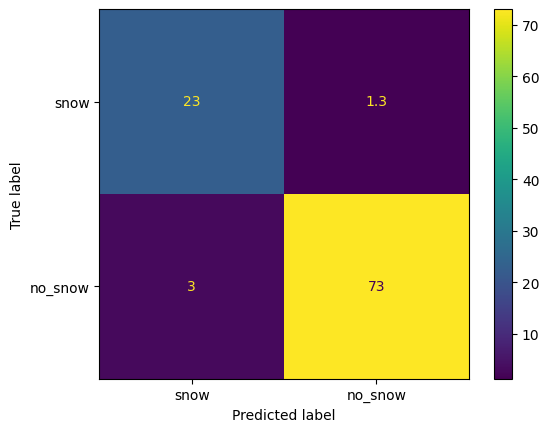

In [11]:
plot_confusion_table(nasa_pseudo_l3_metrics_ds)

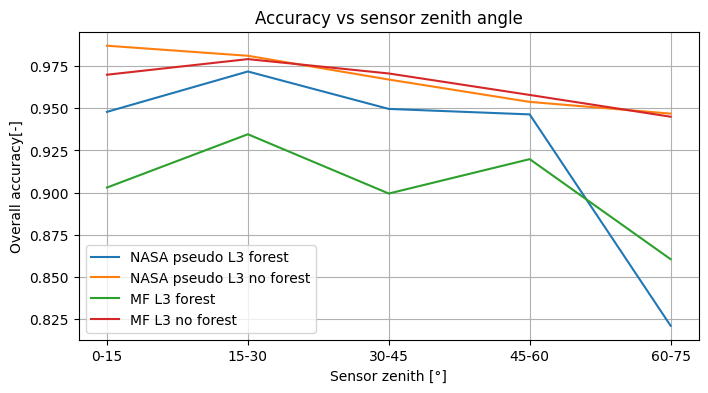

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
solar_zenith_bins = nasa_pseudo_l3_metrics_ds.coords['sensor_zenith_bins'].values
ax.plot(solar_zenith_bins, nasa_pseudo_l3_metrics_ds.sel(forest_mask_bins='forest').groupby('sensor_zenith_bins').map(accuracy), label='NASA pseudo L3 forest')
ax.plot(solar_zenith_bins, nasa_pseudo_l3_metrics_ds.sel(forest_mask_bins='no_forest').groupby('sensor_zenith_bins').map(accuracy), label='NASA pseudo L3 no forest')
ax.plot(solar_zenith_bins, mf_metrics_ds.sel(forest_mask_bins='forest').groupby('sensor_zenith_bins').map(accuracy), label='MF L3 forest')
ax.plot(solar_zenith_bins, mf_metrics_ds.sel(forest_mask_bins='no_forest').groupby('sensor_zenith_bins').map(accuracy), label='MF L3 no forest')
ax.set_title('Accuracy vs sensor zenith angle')
ax.set_xlabel('Sensor zenith [°]')
ax.set_ylabel('Overall accuracy[-]')
ax.grid(True)
ax.legend()

In [36]:
nasa_pseudo_l3_metrics_ds.coords['ref_bins'].values[1:]

array(['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-99', '100'], dtype='<U5')

In [29]:
nasa_l3_metrics_ds.groupby('ref_bins').map(accuracy)

<xarray.DataArray (ref_bins: 12)> Size: 96B
array([0.96925941,        nan, 0.9993961 , 0.80201642, 0.87987429,
       0.93383956, 0.96225328, 0.97549959, 0.98531801, 0.98937998,
       0.99367112, 0.99818538])
Coordinates:
  * ref_bins  (ref_bins) <U5 240B '0' '1-10' '100' ... '71-80' '81-90' '91-99'

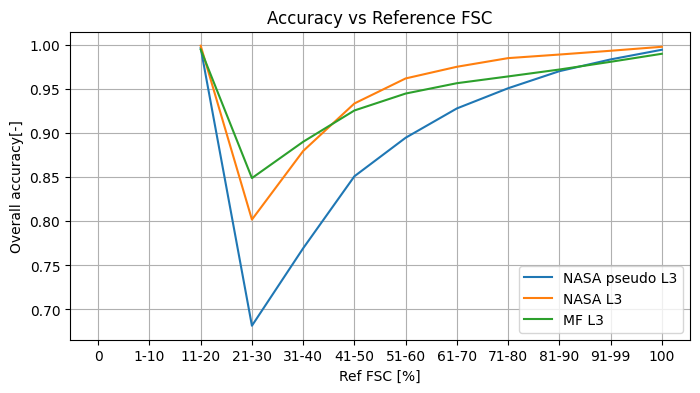

In [34]:
import numpy as np


fig, ax = plt.subplots(figsize=(8,4))
ref_fsc_bins = nasa_pseudo_l3_metrics_ds.coords['ref_bins'].values
ax.plot(ref_fsc_bins, nasa_pseudo_l3_metrics_ds.groupby('ref_bins').map(accuracy), label='NASA pseudo L3')
ax.plot(ref_fsc_bins, nasa_l3_metrics_ds.groupby('ref_bins').map(accuracy), label='NASA L3')
ax.plot(ref_fsc_bins, mf_metrics_ds.groupby('ref_bins').map(accuracy), label='MF L3')
ax.set_title('Accuracy vs Reference FSC')
ax.set_xlabel('Ref FSC [%]')
ax.set_ylabel('Overall accuracy[-]')
ax.grid(True)
ax.legend()